## This scripts aims to;
- load in WW data that has been mapped to CIS sub-regions
- explore LOD by CID/CIS prevalence
- this analysis has been updated, including all the replicate data

In [27]:
install.packages('janitor')
install.packages('cowplot')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [29]:
#load in packages
library(tidyverse)
library(janitor)
library(ggplot2)
library(cowplot)

In [30]:
# file 8 

In [31]:
# read in data
# -- this data has been updated to include everything we need
datadir <- c("/home/ec2-user/SageMaker/jbc-wastewater-analysis/data/")
dat <- read.csv(paste0(datadir,"raw_data_ww_10_cis_mar22.csv")) %>% clean_names()

#print(dat$date[1:3])
dat$date <- as.Date(dat$date,'%Y-%m-%d')
summary(dat$date)
names(dat) 

# dates relevant for the paper...
first_date <- as.Date("01-07-2020",'%d-%m-%Y')
last_date <- as.Date("31-03-2021",'%d-%m-%Y')  #
#table(dat2$)
dat2 <- dat %>% filter(date>=first_date & date<=last_date & analysis_lab_code=='EA')
dim(dat2)
head(dat2)
#dir()

Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2020-09-04" "2020-10-12" "2020-11-20" "2020-11-20" "2021-01-03" "2021-02-10"

[1] "x"                                                
  [2] "startday"                                         
  [3] "ww_site_code"                                     
  [4] "sample_id"                                        
  [5] "timestamp_cdw_processed"                          
  [6] "site_skey"                                        
  [7] "date"                                             
  [8] "time_sample_collected"                            
  [9] "date_sample_received"                             
 [10] "time_sample_received"                             
 [11] "date_sample_analysed"                             
 [12] "time_sample_analysed"                             
 [13] "date_sample_reported"                             
 [14] "time_sample_reported"                             
 [15] "sub_sample_volume_ml"                             
 [16] "temp_within_limits_ind"                           
 [17] "transit_within_limits_ind"                        
 [18] "target_gene_ind"                                  
 [19] "ansis_control"                                    
 [20] "reac_vol_sars"                                    
 [21] "reac_vol_control"                                 
 [22] "raw_ansis_sars_repc_1"                            
 [23] "raw_ansis_sars_repc_2"                            
 [24] "raw_ansis_sars_repc_3"                            
 [25] "raw_ansis_sars_repc_mean"                         
 [26] "raw_ansis_sars_repc_std"                          
 [27] "raw_ansis_sars_ct_repc_1"                         
 [28] "raw_ansis_sars_ct_repc_2"                         
 [29] "raw_ansis_sars_ct_repc_3"                         
 [30] "raw_ansis_control_repc_1"                         
 [31] "raw_ansis_control_repc_2"                         
 [32] "raw_ansis_control_repc_3"                         
 [33] "raw_ansis_control_ct_repc_1"                      
 [34] "raw_ansis_control_ct_repc_2"                      
 [35] "raw_ansis_control_ct_repc_3"                      
 [36] "raw_ansis_control_con_repc_1"                     
 [37] "raw_ansis_control_con_repc_2"                     
 [38] "raw_ansis_control_con_repc_3"                     
 [39] "raw_ansis_control_ct_con_repc_1"                  
 [40] "raw_ansis_control_ct_con_repc_2"                  
 [41] "raw_ansis_control_ct_con_repc_3"                  
 [42] "sars_cov2_gc_l_mean"                              
 [43] "control_gc_l_mean"                                
 [44] "lab_analysis_method"                              
 [45] "lod_sars_gc_l"                                    
 [46] "lod_control_gc_l"                                 
 [47] "lod_sars_ct"                                      
 [48] "lod_control_ct"                                   
 [49] "loq_sars_gc_l"                                    
 [50] "loq_control_gc_l"                                 
 [51] "loq_sars_ct"                                      
 [52] "loq_control_ct"                                   
 [53] "rna_detected_ind"                                 
 [54] "analysis_lab_code"                                
 [55] "sample_ph_pre_ansis"                              
 [56] "conductivity_ms_cm"                               
 [57] "suspended_solids_mg_l"                            
 [58] "dry_matter_mg_l"                                  
 [59] "ammonia_mg_l"                                     
 [60] "ophosph_mg_l"                                     
 [61] "turbidity_ntu"                                    
 [62] "grab_compo_ind"                                   
 [63] "autosample_volume_ml"                             
 [64] "compo_win_start_time"                             
 [65] "comp_collect_interval_min"                        
 [66] "lab_comments"                                     
 [67] "sample_barcode_scan"                              
 [68] "date_compo_started"                               
 [69] "time_compo_started"                               


[1] 10284   119

,x,startday,ww_site_code,sample_id,timestamp_cdw_processed,site_skey,date,time_sample_collected,date_sample_received,time_sample_received,⋯,sars_cov2_gc_l_mean_v2,grab_compo_boo,catchment_area,dayofweek,cis20cd,catch_in_cis_prop,catch_cis_population,median_prob,ll,ul
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<date>,<int>,<chr>,<int>,⋯,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6895,2020-08-31,UKENNE_NU_TP000055,2003957-01,2022-03-10 14:02:42.0,21565,2020-09-04,900,2020-09-05,834,⋯,411.6003,1,75.71834,4,J06000104,0.190042,58576.83,0.1632855,0.09930407,0.2683391
2,6896,2020-08-31,UKENNE_NU_TP000055,2003957-02,2022-03-10 14:02:42.0,21565,2020-09-06,1215,2020-09-07,908,⋯,10322.5654,1,75.71834,6,J06000104,0.190042,58576.83,0.1871473,0.11667896,0.2993406
3,6900,2020-09-07,UKENNE_NU_TP000055,2003957-03,2022-03-10 14:02:42.0,21565,2020-09-07,900,2020-09-08,824,⋯,1641.4827,1,75.71834,0,J06000104,0.190042,58576.83,0.1990781,0.12536641,0.3148414
4,6899,2020-09-07,UKENNE_NU_TP000055,2003957-04,2022-03-10 14:02:42.0,21565,2020-09-09,900,2020-09-10,847,⋯,66.5000,1,75.71834,2,J06000104,0.190042,58576.83,0.2229399,0.14274130,0.3458429
5,6898,2020-09-07,UKENNE_NU_TP000055,2003957-05,2022-03-10 14:02:42.0,21565,2020-09-11,900,2020-09-12,837,⋯,608.0800,1,75.71834,4,J06000104,0.190042,58576.83,0.2536489,0.16576187,0.3854879
6,6897,2020-09-07,UKENNE_NU_TP000055,2003957-06,2022-03-10 14:02:42.0,21565,2020-09-13,900,2020-09-14,928,⋯,1991.5646,1,75.71834,6,J06000104,0.190042,58576.83,0.2912053,0.19442813,0.4337764


In [19]:
names(dat2)
head(dat2)

[1] "x"                                                
  [2] "startday"                                         
  [3] "ww_site_code"                                     
  [4] "sample_id"                                        
  [5] "timestamp_cdw_processed"                          
  [6] "site_skey"                                        
  [7] "date"                                             
  [8] "time_sample_collected"                            
  [9] "date_sample_received"                             
 [10] "time_sample_received"                             
 [11] "date_sample_analysed"                             
 [12] "time_sample_analysed"                             
 [13] "date_sample_reported"                             
 [14] "time_sample_reported"                             
 [15] "sub_sample_volume_ml"                             
 [16] "temp_within_limits_ind"                           
 [17] "transit_within_limits_ind"                        
 [18] "target_gene_ind"                                  
 [19] "ansis_control"                                    
 [20] "reac_vol_sars"                                    
 [21] "reac_vol_control"                                 
 [22] "raw_ansis_sars_repc_1"                            
 [23] "raw_ansis_sars_repc_2"                            
 [24] "raw_ansis_sars_repc_3"                            
 [25] "raw_ansis_sars_repc_mean"                         
 [26] "raw_ansis_sars_repc_std"                          
 [27] "raw_ansis_sars_ct_repc_1"                         
 [28] "raw_ansis_sars_ct_repc_2"                         
 [29] "raw_ansis_sars_ct_repc_3"                         
 [30] "raw_ansis_control_repc_1"                         
 [31] "raw_ansis_control_repc_2"                         
 [32] "raw_ansis_control_repc_3"                         
 [33] "raw_ansis_control_ct_repc_1"                      
 [34] "raw_ansis_control_ct_repc_2"                      
 [35] "raw_ansis_control_ct_repc_3"                      
 [36] "raw_ansis_control_con_repc_1"                     
 [37] "raw_ansis_control_con_repc_2"                     
 [38] "raw_ansis_control_con_repc_3"                     
 [39] "raw_ansis_control_ct_con_repc_1"                  
 [40] "raw_ansis_control_ct_con_repc_2"                  
 [41] "raw_ansis_control_ct_con_repc_3"                  
 [42] "sars_cov2_gc_l_mean"                              
 [43] "control_gc_l_mean"                                
 [44] "lab_analysis_method"                              
 [45] "lod_sars_gc_l"                                    
 [46] "lod_control_gc_l"                                 
 [47] "lod_sars_ct"                                      
 [48] "lod_control_ct"                                   
 [49] "loq_sars_gc_l"                                    
 [50] "loq_control_gc_l"                                 
 [51] "loq_sars_ct"                                      
 [52] "loq_control_ct"                                   
 [53] "rna_detected_ind"                                 
 [54] "analysis_lab_code"                                
 [55] "sample_ph_pre_ansis"                              
 [56] "conductivity_ms_cm"                               
 [57] "suspended_solids_mg_l"                            
 [58] "dry_matter_mg_l"                                  
 [59] "ammonia_mg_l"                                     
 [60] "ophosph_mg_l"                                     
 [61] "turbidity_ntu"                                    
 [62] "grab_compo_ind"                                   
 [63] "autosample_volume_ml"                             
 [64] "compo_win_start_time"                             
 [65] "comp_collect_interval_min"                        
 [66] "lab_comments"                                     
 [67] "sample_barcode_scan"                              
 [68] "date_compo_started"                               
 [69] "time_compo_started"                               


,x,startday,ww_site_code,sample_id,timestamp_cdw_processed,site_skey,date,time_sample_collected,date_sample_received,time_sample_received,⋯,water_company_uu,water_company_ww,water_company_wxw,water_company_yw,reception_delay,catchment_area,dayofweek,cis20cd,catch_in_cis_prop,catch_cis_population
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>
1,378,2021-03-01,UKENTH_TWU_TP000015,2005159-24,2021-12-15 16:01:32.0,22225,2021-03-01,1000,2021-03-02,811,⋯,0,0,0,0,22.18333,202.7331,0,J06000198,0.1201438,54129.46
2,379,2021-03-01,UKENTH_TWU_TP000015,2005159-24,2021-12-15 16:01:32.0,22225,2021-03-01,1000,2021-03-02,811,⋯,0,0,0,0,22.18333,202.7331,0,J06000190,1.3827349,259781.33
3,380,2021-03-01,UKENTH_TWU_TP000015,2005159-24,2021-12-15 16:01:32.0,22225,2021-03-01,1000,2021-03-02,811,⋯,0,0,0,0,22.18333,202.7331,0,J06000189,0.9624285,96989.70
4,381,2021-03-01,UKENTH_TWU_TP000015,2005159-25,2021-12-15 16:01:32.0,22225,2021-03-03,1000,2021-03-04,748,⋯,0,0,0,0,21.80000,202.7331,2,J06000198,0.1201438,54129.46
5,382,2021-03-01,UKENTH_TWU_TP000015,2005159-25,2021-12-15 16:01:32.0,22225,2021-03-03,1000,2021-03-04,748,⋯,0,0,0,0,21.80000,202.7331,2,J06000190,1.3827349,259781.33
6,383,2021-03-01,UKENTH_TWU_TP000015,2005159-25,2021-12-15 16:01:32.0,22225,2021-03-03,1000,2021-03-04,748,⋯,0,0,0,0,21.80000,202.7331,2,J06000189,0.9624285,96989.70


In [32]:
summary(dat2$raw_ansis_sars_repc_1)
print(paste0('samples with <LOD = ',sum(dat2$raw_ansis_sars_repc_1 < 0)))
tmp <- table(dat2$raw_ansis_sars_repc_1)
print(tmp[1:5])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -4.00   15.83   82.32  262.80  295.43 5059.12 

[1] "samples with <LOD = 787"

                -4  -1.99858585046604  -1.39127373695374  -1.31356525421143 
               774                  6                  3                  2 
-0.671360651652018 
                 1 



   0    1 
6513 3771 


Warning message in eval(expr, envir, enclos):
“NaNs produced”


[1] "-4 in log10 space is = NaN"
[1] 983


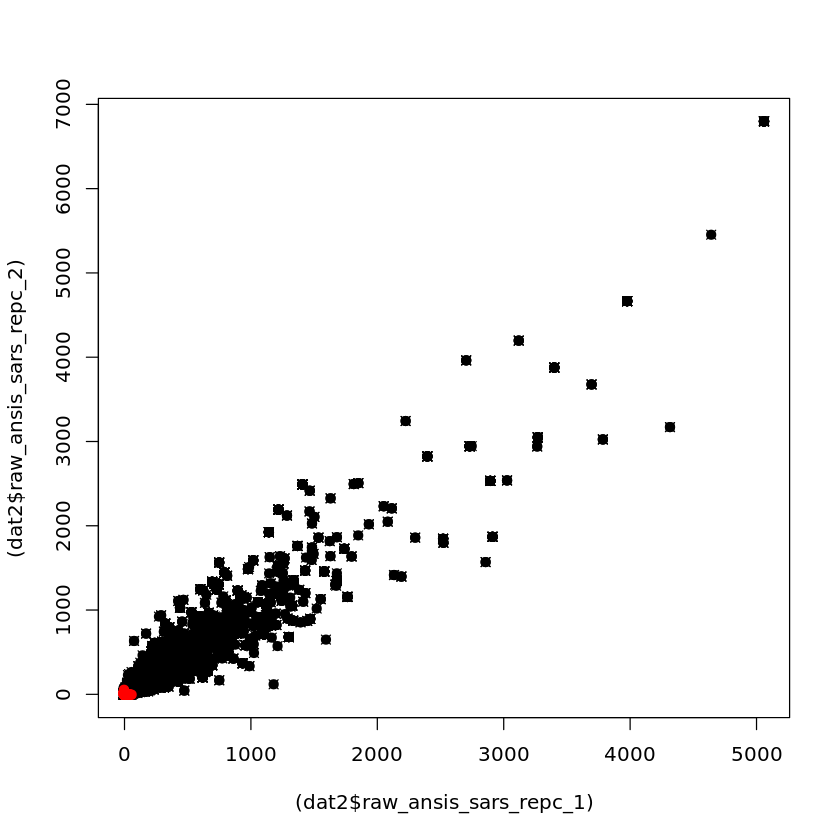

In [33]:
# I checked whether LOD was calculated correctly and it isn't, sigh
# but actually I think this depends on the definition, so it's ok.
# calc again
dat2$sars_raw_rep_below_lod <- 0
dat2$sars_raw_rep_below_lod[dat2$raw_ansis_sars_repc_1 == -4] <- 1
dat2$sars_raw_rep_below_lod[dat2$raw_ansis_sars_repc_2 == -4] <- 1
#print(summary(dat2$sars_below_lod-dat2$tmp))

# check that sars_below_lod is correctly done
print(table(dat2$sars_below_lod))
tmp <- log10(-4)
print(paste0('-4 in log10 space is = ',tmp))
# plot
plot((dat2$raw_ansis_sars_repc_1),(dat2$raw_ansis_sars_repc_2),pch=4)
aa <- which(dat2$sars_raw_rep_below_lod == 0)
points((dat2$raw_ansis_sars_repc_1[aa]),(dat2$raw_ansis_sars_repc_2[aa]),pch=19,col='black')
oo <- which(dat2$sars_raw_rep_below_lod == 1)
print(length(oo))
points((dat2$raw_ansis_sars_repc_1[oo]),(dat2$raw_ansis_sars_repc_2[oo]),pch=19,col='red')



In [47]:
# provide breaks for gc/l data
# group obs by these values, and look at the LoD curves
summary(log10(dat2$sars_cov2_gc_l_mean))
brks <- seq(1,6,by=0.1)
labels <- round(10^brks[1:(length(brks)-1)],1)
dat2$sars_cov2_gc_l_mean_cut_v2 <- cut(log10(dat2$sars_cov2_gc_l_mean_v2),breaks=brks,labels=labels[1:(length(brks)-1)])
table(dat2$sars_cov2_gc_l_mean_cut_v2)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2538  3.5884  4.0963  4.0331  4.5991  5.8979 


      10     12.6     15.8       20     25.1     31.6     39.8     50.1 
       0        0        0        0        0        0        0        0 
    63.1     79.4      100    125.9    158.5    199.5    251.2    316.2 
     519        0        0        3        1        5        6        5 
   398.1    501.2      631    794.3     1000   1258.9   1584.9   1995.3 
      27       26       48       71      160      143      456      380 
  2511.9   3162.3   3981.1   5011.9   6309.6   7943.3    10000  12589.3 
     465      301      457      464      607      504      551      625 
 15848.9  19952.6  25118.9  31622.8  39810.7  50118.7  63095.7  79432.8 
     436      493      465      492      378      482      404      295 
   1e+05 125892.5 158489.3 199526.2 251188.6 316227.8 398107.2 501187.2 
     293      268      168      111       60       50       32       14 
630957.3 794328.2 
      15        0 

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Call:
glm(formula = blw_lod_pct ~ log(sars_cov2_gc_l_mean_cut_v2), 
    family = binomial, data = tab)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5679  -0.3291  -0.1093   0.2882   1.0817  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)   
(Intercept)                     -11.6632     3.6922  -3.159  0.00158 **
log(sars_cov2_gc_l_mean_cut_v2)   1.1370     0.3597   3.161  0.00157 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 41.031  on 38  degrees of freedom
Residual deviance: 13.988  on 37  degrees of freedom
  (1 observation deleted due to missingness)
AIC: 25.29

Number of Fisher Scoring iterations: 6



Warning message:
“Removed 1 rows containing missing values (geom_point).”


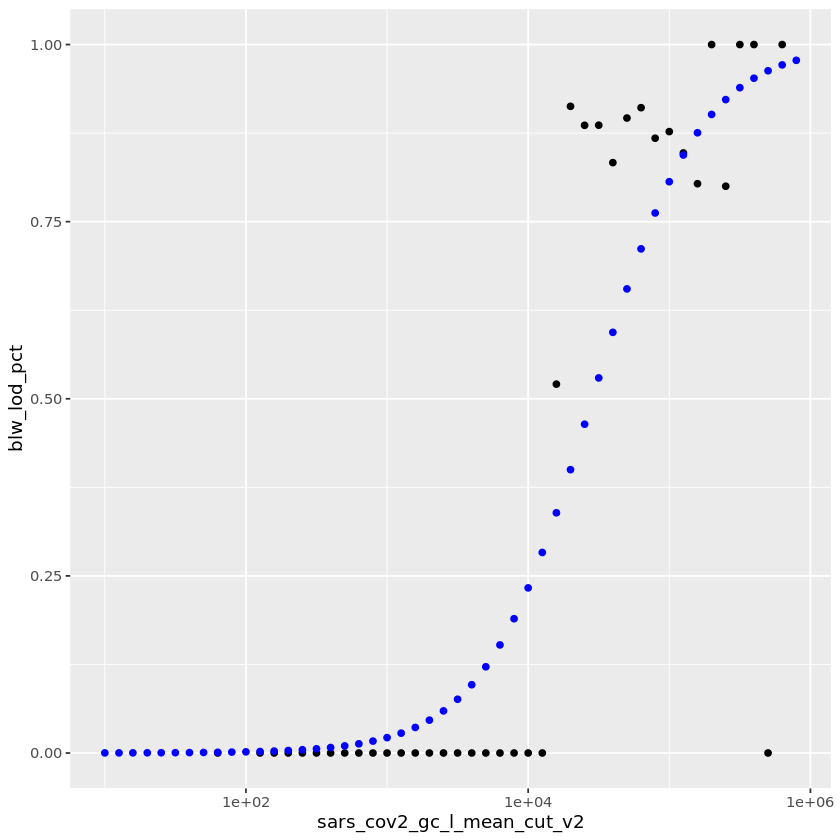

In [48]:
tab <- dat2 %>% group_by(sars_cov2_gc_l_mean_cut_v2) %>% summarize(n=n(),
                                                                   blw_lod = sum(sars_below_lod),
                                                                   blw_lod_pct = sum(sars_below_lod)/n())
tab <- as.data.frame(tab)
tab$sars_cov2_gc_l_mean_cut_v2 <- as.numeric(as.character(tab$sars_cov2_gc_l_mean_cut_v2))
p1 <- ggplot(tab,aes(sars_cov2_gc_l_mean_cut_v2,blw_lod_pct)) + geom_point() + scale_x_log10()
# so can I fit a logistic model to the slope? 
m1 <- glm(blw_lod_pct ~ log(sars_cov2_gc_l_mean_cut_v2),data=tab,family=binomial)
print(summary(m1))
ndat <- as.data.frame(x=brks[1:(length(brks)-1)])
ndat$sars_cov2_gc_l_mean_cut_v2 <- labels[1:(length(brks)-1)]
ndat$pred <- predict(m1,newdata = ndat,type = "response")
p1 + geom_point(data=ndat,aes(sars_cov2_gc_l_mean_cut_v2,pred),col="blue")  # ok - can fit a logistic.



In [54]:
# look at impact of site....
#table(dat2$ww_site_code)
tab2 <- dat2 %>% group_by(sars_cov2_gc_l_mean_cut_v2,ww_site_code) %>% summarize(n=n(),
                                                                   compo_frac = mean(compo_frac),
                                                                   blw_lod = sum(sars_below_lod),
                                                                   blw_lod_pct = sum(sars_below_lod)/n())
tab2 <- as.data.frame(tab2)
tab2$sars_cov2_gc_l_mean_cut_v2 <- as.numeric(as.character(tab2$sars_cov2_gc_l_mean_cut_v2))

p2 <- ggplot(tab2,aes(jitter(sars_cov2_gc_l_mean_cut_v2),blw_lod_pct,col=ww_site_code)) + geom_point(cex=2) + 
  scale_x_log10() + theme(legend.position = "none") #+ geom_line()

m2d <- glm(blw_lod_pct ~ log(sars_cov2_gc_l_mean_cut_v2) + compo_frac,data=tab2,family=binomial)
print(summary(m2d))
m2c <- glm(blw_lod_pct ~ log(sars_cov2_gc_l_mean_cut_v2) + compo_frac + ww_site_code,data=tab2,family=binomial)
print(summary(m2c))
m2 <- glm(blw_lod_pct ~ log(sars_cov2_gc_l_mean_cut_v2) + ww_site_code,data=tab2,family=binomial)
summary(m2)
m2b <- glm(blw_lod_pct ~ log(sars_cov2_gc_l_mean_cut_v2) ,data=tab2,family=binomial)
summary(m2b)
print(anova(m2,m2b,test="Chi"))

tmp <- unique(dat2$ww_site_code)
ndat <- as.data.frame(expand.grid(x=brks[1:(length(brks)-1)],ww_site_code=tmp))
ndat$sars_cov2_gc_l_mean_cut_v2 <- 10^ndat$x
ndat$pred <- predict(m2,newdata = ndat,type = "response")
p2a <- p2 + geom_hline(yintercept=0.95) +
  geom_line(data=ndat,aes(sars_cov2_gc_l_mean_cut_v2,pred,group=ww_site_code)) +
  xlab('Sars-CoV-2 in sample (gc / l - log10)') + 
  ylab('Proportion of replicates above LoD') 

pdf(paste0(datadir,'lod_analysis_by_site.pdf'),height=6,width=6)
p2a
dev.off()


`summarise()` has grouped output by 'sars_cov2_gc_l_mean_cut_v2'. You can override using the `.groups` argument.

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Call:
glm(formula = blw_lod_pct ~ log(sars_cov2_gc_l_mean_cut_v2) + 
    compo_frac, family = binomial, data = tab2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.4161  -0.1899  -0.0330   0.0857   1.4259  

Coefficients:
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -29.53010    2.33216 -12.662   <2e-16 ***
log(sars_cov2_gc_l_mean_cut_v2)   2.98741    0.23485  12.721   <2e-16 ***
compo_frac                        0.07185    0.28868   0.249    0.803    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1037.97  on 915  degrees of freedom
Residual deviance:  220.42  on 913  degrees of freedom
  (3 observations deleted due to missingness)
AIC: 333.34

Number of Fisher Scoring iterations: 8



Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = blw_lod_pct ~ log(sars_cov2_gc_l_mean_cut_v2) + 
    compo_frac + ww_site_code, family = binomial, data = tab2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.3018  -0.1825  -0.0218   0.0836   1.7572  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -2.971e+01  2.865e+00 -10.369   <2e-16 ***
log(sars_cov2_gc_l_mean_cut_v2)  3.056e+00  2.465e-01  12.400   <2e-16 ***
compo_frac                      -4.306e-01  1.202e+00  -0.358    0.720    
ww_site_codeUKENAN_AW_TP000063   3.222e-01  1.193e+00   0.270    0.787    
ww_site_codeUKENAN_AW_TP000161  -5.058e-02  1.255e+00  -0.040    0.968    
ww_site_codeUKENAN_AW_TP000200  -1.282e-01  1.205e+00  -0.106    0.915    
ww_site_codeUKENAN_AW_TP000210   3.444e-01  1.193e+00   0.289    0.773    
ww_site_codeUKENMI_ST_TP000020  -1.012e-01  1.661e+00  -0.061    0.951    
ww_site_codeUKENMI_ST_TP000068  -1.123e+00  1.679e+00  -0.669  

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = blw_lod_pct ~ log(sars_cov2_gc_l_mean_cut_v2) + 
    ww_site_code, family = binomial, data = tab2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.3100  -0.1808  -0.0216   0.0834   1.7506  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -3.018e+01  2.567e+00 -11.758   <2e-16 ***
log(sars_cov2_gc_l_mean_cut_v2)  3.062e+00  2.464e-01  12.427   <2e-16 ***
ww_site_codeUKENAN_AW_TP000063   3.058e-01  1.193e+00   0.256    0.798    
ww_site_codeUKENAN_AW_TP000161  -6.418e-02  1.254e+00  -0.051    0.959    
ww_site_codeUKENAN_AW_TP000200  -1.280e-01  1.203e+00  -0.106    0.915    
ww_site_codeUKENAN_AW_TP000210   3.281e-01  1.192e+00   0.275    0.783    
ww_site_codeUKENMI_ST_TP000020   3.131e-01  1.193e+00   0.262    0.793    
ww_site_codeUKENMI_ST_TP000068  -7.102e-01  1.222e+00  -0.581    0.561    
ww_site_codeUKENMI_ST_TP000074  -8.705e-02  1.191e+00  -0.073    0.942    
w

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Call:
glm(formula = blw_lod_pct ~ log(sars_cov2_gc_l_mean_cut_v2), 
    family = binomial, data = tab2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.4055  -0.1876  -0.0338   0.0866   1.4392  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -29.4409     2.2999  -12.80   <2e-16 ***
log(sars_cov2_gc_l_mean_cut_v2)   2.9826     0.2337   12.76   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1037.97  on 915  degrees of freedom
Residual deviance:  220.49  on 914  degrees of freedom
  (3 observations deleted due to missingness)
AIC: 330.97

Number of Fisher Scoring iterations: 8


Analysis of Deviance Table

Model 1: blw_lod_pct ~ log(sars_cov2_gc_l_mean_cut_v2) + ww_site_code
Model 2: blw_lod_pct ~ log(sars_cov2_gc_l_mean_cut_v2)
  Resid. Df Resid. Dev  Df Deviance Pr(>Chi)
1       870     211.96                      
2       914     220.49 -44  -8.5209        1


Warning message:
“Removed 3 rows containing missing values (geom_point).”


png 
  2